# CIFAR10 with Keras and CNN
Testing Keras' CNNs on CIFAR10 with a pretty typical layer disposition.

## Data Setup

In [192]:
from keras.datasets import cifar10

In [193]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()
#plt.imshow(x_train[1658])

In [194]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [195]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

x_validation = x_test[0:5000]
y_validation = y_test[0:5000]
x_test = x_test[5000:]
y_test = y_test[5000:]

## Model Definition

In [196]:
from keras.models import Sequential
model = Sequential()

In [197]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [198]:
seed = 7
import numpy;
from keras.layers import Dropout
from keras.constraints import maxnorm

model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,
                kernel_size=(3, 3),
                activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,
                kernel_size=(3, 3),
                activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,
                kernel_size=(3, 3),
                activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256,
                kernel_size=(3, 3),
                activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(10, activation='softmax'))


# numpy.random.seed(seed)
# model.add(Conv2D(filters=32, 
#                 kernel_size=(3, 3),
#                 activation='relu',
#                 input_shape=(32, 32, 3)))
# model.add(Dropout(0.2))
# model.add(Conv2D(filters=64,
#                 kernel_size=(3, 3),
#                 activation='relu'))
# model.add(MaxPool2D())
# model.add(Conv2D(filters=128,
#                 kernel_size=(3, 3),
#                 activation='relu'))
# model.add(Dropout(0.2))
# model.add(Conv2D(filters=256,
#                 kernel_size=(3, 3),
#                 activation='relu'))
# model.add(Dropout(0.2))


In [199]:
# from keras.constraints import maxnorm

# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dense(10, activation='softmax'))

In [200]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(optimizer=adam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [201]:
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_97 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_98 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 26, 26, 32)        9248      
_________________________________________________________________
dropout_99 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 32)      

## Fitting

In [202]:
from keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='auto')

history = model.fit(x_train, y_train, batch_size=100, epochs=60, verbose=1, validation_data=(x_test, y_test))

Epoch 1/60
500/500 [==============================] - 12s 23ms/step - loss: 1.9616 - accuracy: 0.2616 - val_loss: 1.8500 - val_accuracy: 0.3182
Epoch 2/60
500/500 [==============================] - 11s 23ms/step - loss: 1.6379 - accuracy: 0.3923 - val_loss: 1.5530 - val_accuracy: 0.4276
Epoch 3/60
500/500 [==============================] - 11s 23ms/step - loss: 1.4613 - accuracy: 0.4636 - val_loss: 1.3600 - val_accuracy: 0.4878
Epoch 4/60
500/500 [==============================] - 11s 23ms/step - loss: 1.3365 - accuracy: 0.5157 - val_loss: 1.2575 - val_accuracy: 0.5444
Epoch 5/60
500/500 [==============================] - 11s 23ms/step - loss: 1.2341 - accuracy: 0.5510 - val_loss: 1.1797 - val_accuracy: 0.5728
Epoch 6/60
500/500 [==============================] - 11s 23ms/step - loss: 1.1619 - accuracy: 0.5828 - val_loss: 1.1456 - val_accuracy: 0.5880
Epoch 7/60
500/500 [==============================] - 11s 23ms/step - loss: 1.1070 - accuracy: 0.6006 - val_loss: 1.1355 - val_accuracy:

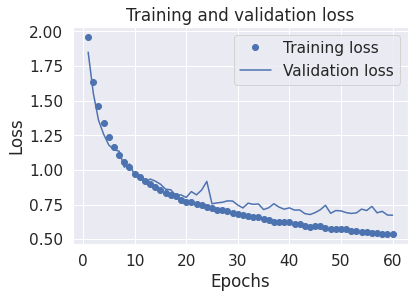

In [203]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

157/157 - 1s - loss: 0.6779 - accuracy: 0.7770
157/157 - 1s - loss: 0.6726 - accuracy: 0.7680
1563/1563 - 5s - loss: 0.3397 - accuracy: 0.8873


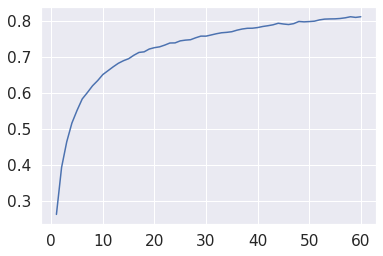

In [204]:
scoreVal = model.evaluate(x_validation, y_validation, verbose=2)
scoreTest = model.evaluate(x_test, y_test, verbose=2)
scoreTrain = model.evaluate(x_train, y_train, verbose=2)
plt.plot(epochs, history_dict['accuracy'], 'b', label='Accuracy')
plt.show()

(1, 30, 30, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


(1, 28, 28, 32)
(1, 28, 28, 32)
(1, 26, 26, 32)
(1, 26, 26, 32)
(1, 24, 24, 32)
(1, 24, 24, 32)
(1, 22, 22, 256)
(1, 11, 11, 256)
(1, 9, 9, 64)
(1, 9, 9, 64)
(1, 7, 7, 64)
(1, 7, 7, 64)
(1, 5, 5, 256)
(1, 5, 5, 256)
(1, 6400)
(1, 32)
(1, 10)


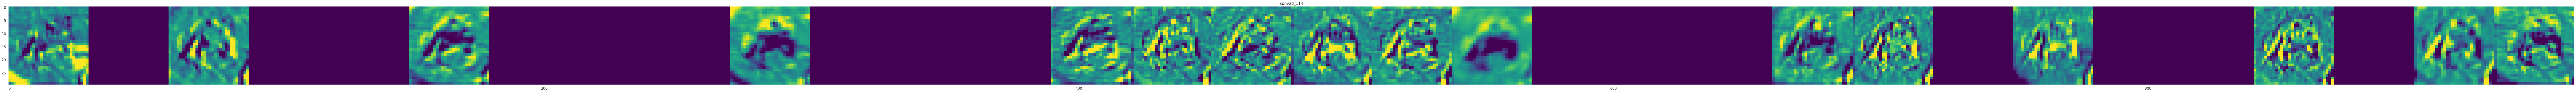

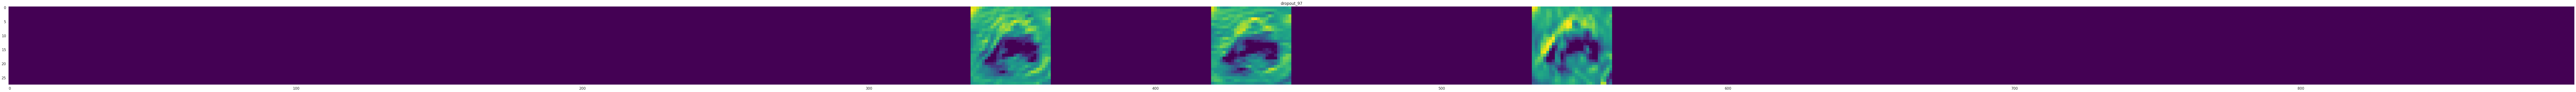

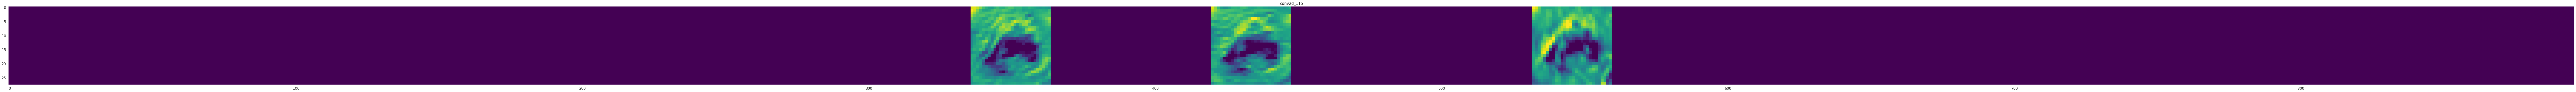

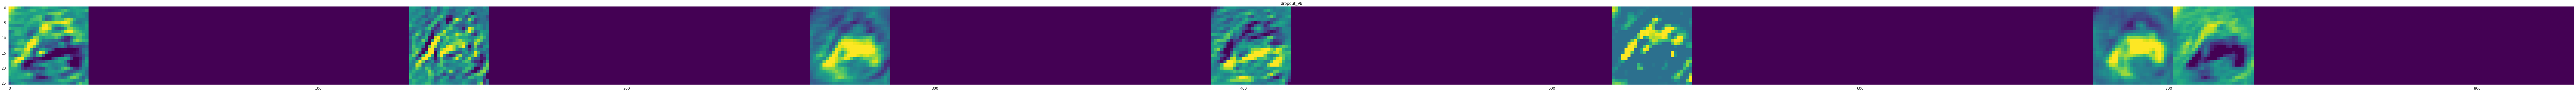

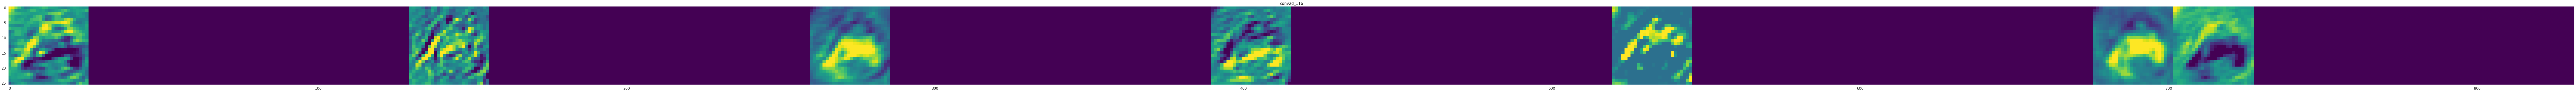

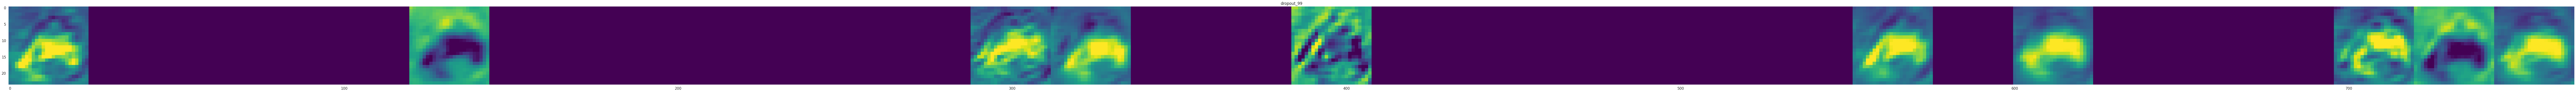

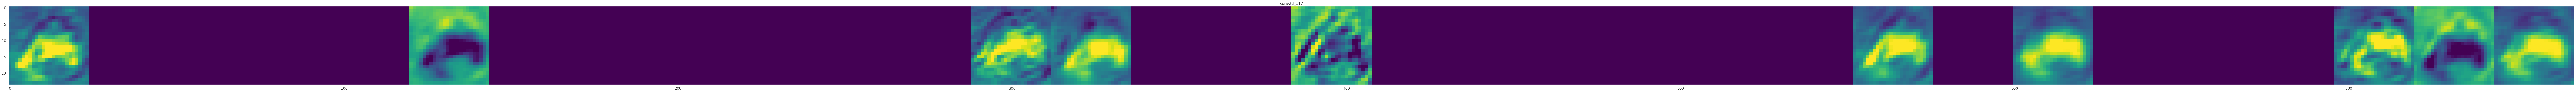

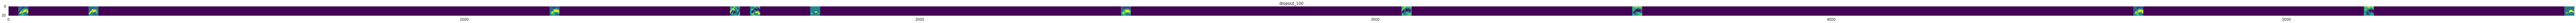

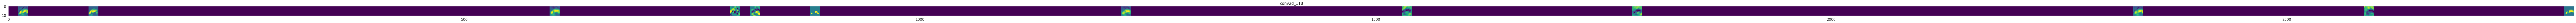

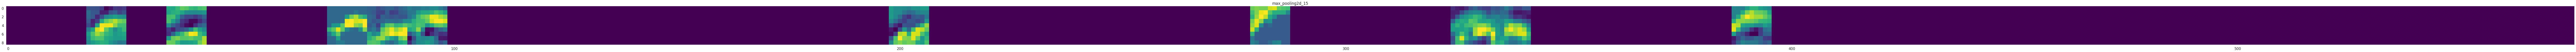

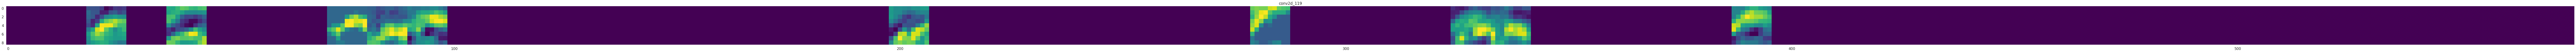

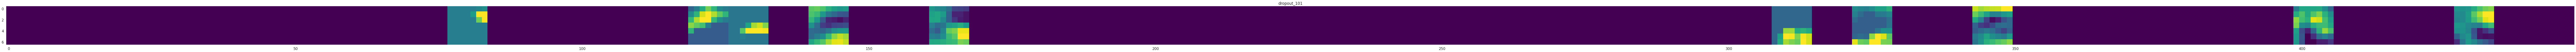

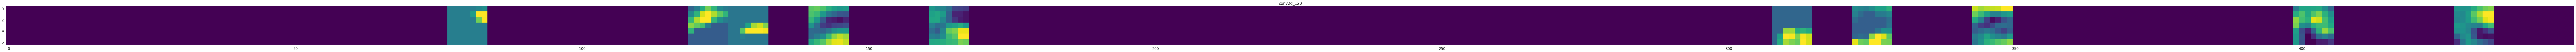

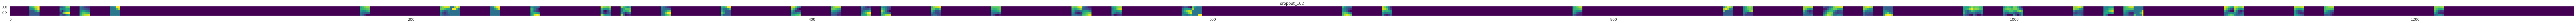

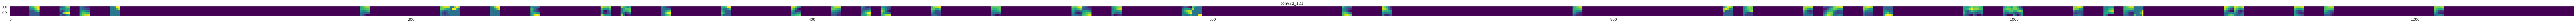

In [205]:
# img_path='cao.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

x = x_train[0]



successive_outputs = [layer.output for layer in model.layers[1:]]#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)#Load the input image
# img = load_img(img_path, target_size=(150, 150))# Convert ht image to Array of dimension (150,150,3)
# x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
j=0;
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 200. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
    plt.savefig('books_read'+str(j)+'.png')
    j+=1;

0 512
1 495
2 488
3 503
4 493
5 512
6 509
7 505
8 496
9 487
[[391   5  21   9   5   0   2   1  61  17]
 [  6 418   1   2   0   2   3   0  20  43]
 [ 23   0 336  29  36  24  15  10  10   5]
 [  4   1  44 287  31  80  25  11  14   6]
 [  9   0  22  26 376  14  12  30   3   1]
 [  2   0  23  79  18 358   2  23   3   4]
 [  3   1  34  30  16  10 400   6   9   0]
 [  6   1  14  20  39  21   1 397   1   5]
 [ 19   9   1   5   5   1   0   3 443  10]
 [  8  17   1   6   3   1   1   2  14 434]]


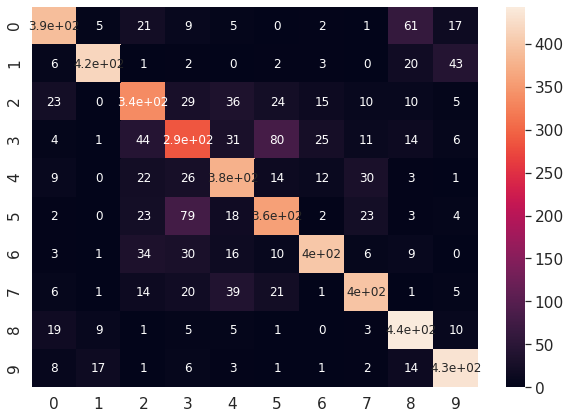

In [206]:
import seaborn as sn
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras import backend as K


y_pred = model.predict_classes(x_test, batch_size=50,verbose=0)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()